# Analiza skupa podataka

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff

plt.rcParams['figure.figsize'] = [16, 20]

## Učitavanje skupa podataka

Skup podataka je spremljen u .arff datoteci. 
Navedena datoteka sastoji se od sljedećih djelova:
- @relation - predstavlja relaciju podataka
- @attribute &#60;name&#62; &#60;type&#62; - opisuje značajku jednog podatka. Ove naredbe su navedene slijedno za sve značajke u skupu podataka
- @data - oznaka za početak skupa podataka
- podaci - podaci su navedeni u obliku vrijednosti značajki odvojenih zarezom (identično kao i u slučajku .csv datoteka). Svaki redak predstavlja jedan podatak
 


Podaci se inicijalno učitavaju iz .arff datoteke pomoću funkcije *loadarff* iz knjižnice *scypy.io*.
Funkcija kao rezultat daje dvije varijable: *raw_data* i *metadata*.
Prva varijabla sadrži numpy matricu sa podacima iz skupa podataka, dok druga varijabla sadrži opis značajki.

Iz numpy matrice podataka se stvara Pandas okvir pomoću kojeg se u nastavku analiziraju podaci. Imena značajki su sadržana u tipu podataka numpy matrice.
Tip podatka numpy matrice je opisan kao lista parova u kojima se nalazi ime značajke i tip podatka te značajke. Zbog takvog tipa podatka moguće je iz numpy matrice stvoriti Pandas radni okvir isključivo na temelju matrice, odnosno nisu potrebni nikakvi dodatni parameteri.

Iako su podaci u skupu podataka numerički (imaju vrijednosti: -1, 0 i 1), parsiranje podataka rezultira podacima u obliku niza znakova (vrijednosti: "-1", "0", "1") te je stoga dodatno potrebno sve podatke pretvoriti u cjelobrojni tip podataka.

Konačno na kraju koda se ispisuju značajke skupa podataka te ukupni broj značajki skupa.

### Tipovi podataka

Značajke u skupu podataka imaju nominalne vrijednosti. Većina značajki poprima vrijednost -1 ili 1.

Značajke *URL_length*, *having_Sub_Domain*, *SSLfinal_State*, *URL_of_Anchor*, *Links_in_tags*, *SFH*, *web_traffic* i *Links_pointing_to_page* mogu poprimiti jednu od sljedećih vrijednosti: -1, 0, 1.

Značajka *Redirect* može poprimiti vrijednost 0 ili 1.

#### Opis vrijednosti ciljnih klasa i značajki

Ciljne klase poprimaju vrijednost -1 ili 1.

U ciljnim klasama broj -1 označava da se radi o phishing stranici, dok 1 označava da se radi o legitimnoj stranici.

U značajkama vrijednost -1 označava da je stranica potencijalno zlonamjernog karektera, iako to ne mora nužno vrijediti. Vrijednost 1 označava da je stranica vrlo vjerojatno legitimna. Vrijednost 0 označava da je stranica "sumnjiva" odnosno da je moguće da se radi o phishing stranici.

In [110]:
raw_data, metadata = loadarff("data/Training Dataset.arff",)
data = pd.DataFrame(raw_data)

print("Raw data data type")
print(raw_data.dtype)
print()

#convert values to integers instead of strings
for col in data.columns:
    data[col] = data[col].astype(int)
    col = col.lower()

# data
X = data.loc[:, data.columns != "Result"]
# labels
Y = data.loc[:, data.columns == "Result"]


print("Features:")
print(", ".join(X.columns))
print()
print("Number of features: " + str(len(X.columns)))

Raw data data type
[('having_IP_Address', 'S2'), ('URL_Length', 'S2'), ('Shortining_Service', 'S2'), ('having_At_Symbol', 'S2'), ('double_slash_redirecting', 'S2'), ('Prefix_Suffix', 'S2'), ('having_Sub_Domain', 'S2'), ('SSLfinal_State', 'S2'), ('Domain_registeration_length', 'S2'), ('Favicon', 'S2'), ('port', 'S2'), ('HTTPS_token', 'S2'), ('Request_URL', 'S2'), ('URL_of_Anchor', 'S2'), ('Links_in_tags', 'S2'), ('SFH', 'S2'), ('Submitting_to_email', 'S2'), ('Abnormal_URL', 'S2'), ('Redirect', 'S1'), ('on_mouseover', 'S2'), ('RightClick', 'S2'), ('popUpWidnow', 'S2'), ('Iframe', 'S2'), ('age_of_domain', 'S2'), ('DNSRecord', 'S2'), ('web_traffic', 'S2'), ('Page_Rank', 'S2'), ('Google_Index', 'S2'), ('Links_pointing_to_page', 'S2'), ('Statistical_report', 'S2'), ('Result', 'S2')]

Features:
having_IP_Address, URL_Length, Shortining_Service, having_At_Symbol, double_slash_redirecting, Prefix_Suffix, having_Sub_Domain, SSLfinal_State, Domain_registeration_length, Favicon, port, HTTPS_token,

## Značajke

**having_IP_Address**: varijabla koja označava ima li stranica domenu. Phishing stranice često nemaju domenu te su stoga stranice bez domene sumnjive.
- -1 - Stranica nema domenu
- 1  - Stranica ima domenu

**URL_Length**: Varijabla koja opisuje duljinu URL-a stranice. Pretpostavka je da phishing stranice često imaju dugačak URL.
- -1 - Stranica ima URL dulji od 75 znakova
- 0  - Stranica ima URL duljine između 54 i 75 znakova
- 1  - Stranica ima URL kraći od 54 znakova

**Shortining service**: Varijabla koja prikazuje koristi li stranica servis za skraćivanje URL-a poput BitLy-a ili TinyURL-a.
- -1 - Stranica koristi servis za skraćivanje URL-a
- 1  - Stranica ne koristi servis za skraćivanje URL-a

**having_At_Symbol**: Varijabla koja određuje sadrži li URL simbol "@". Ako URL sadrži simbol "@", preglednici ignoriraju dio prije tog simbola te se stvarni URL stranice nalazi iza simbola "@"
- -1 - URL stranice sadrži simbol "@"
- 1  - URL stranice ne sadrži simbol "@"

**double_slash_redirecting**: Varijabla koja određuje sadrži li URL niz znakova "//". Kada URL sadrži "//", korisnik će biti preusmjeren na stranicu koja je navedena iza "//".
- -1 - URL stranice sadrži niz znakova "//"
- 1  - URL stranice ne sadrži niz znakova "//"

**Prefix_Suffix**: Varijabla koja određuje sadrži li URL simbol "-" ili više takvih simbola. Pretpostavka je da zlonamjerne stranice češće sadrže navedeni simbol od legitimnih stranica.
- -1 - URL stranice sadrži simbol "-"
- 1  - URL stranice ne sadrži simbol "-"

**having_Sub_Domain**: Broj točaka u domeni nakon uklanjanja "www." dijela i nakon uklanjanja djela domena koji sadrži kod države (npr. ".hr", ".uk", ".de" i sl.). Pshishing stranice često sadrže dvije ili više točke u preostalom djelu domene.
- -1 - Više točaka u preostalom djelu domene
- 0  - Dvije točke u preostalom djelu domene
- 1  - Jedna točka u preostalom djelu domene

**SSLfinal_State**: Varijabla koja označava koristi li stranica HTTPS protokol te koliko je star certifikat koji stranica koristi. Dodatno se provjerava je li izdavač certifikata pouzdan.
- -1 - Ostalo
- 0  - stranica koristi HTTPS, ali izdavač certifikata nije pouzdan
- 1  - Stranica koristi HTTPS i certifikat je stariji od jedne godine te je izdan od strane pouzdanog izdavača certifikata

**Domain_registration_length**: Varijabla koja označava koliko je dugo domena registrirana. Phishing stranice često imaju registriranu domenu na kraći period.
- -1 - Domena je registrirana kraće od jedne godine
- 1  - Domena je registrirana dulje od jedne godine

**Favicon**: Indikatorska varijabla koja označava je li ikona web stranice posluženja s vanjskog poslužitelja ili je poslužena sa istog poslužitelja kao i sama stranica. Pretpostavka je da će phishing stranice ikonu web stranice posluživati s vanjskih poslužitelja.
- -1 - Ikona je poslužena s vanjskog poslužitelja
- 1  - Ikona je poslužena s istog poslužitelja kao i stranica

**port**: Varijabla koja određuje jesu li otvoreni dodatni portovi. Legitimne stranice će uglavnom imati otvorene samo neophodne portove poput portova za protokol HTTP i HTTPS dok će phishing stranice imati otvorene dodatne portove preko kojih mogu doći do osjetljivih informacija.
- -1 - Stranica ima otvorene dodatne portove
- 1  - Stranica ima otvorene samo neophodne portove

**HTTPS_token**: Indikatorska varijabla koja označava je li domena stranice sadrži izraz "https" (npr. http://https-www-phishing.com).
- -1 - URL stranice sadrži izraz "https"
- 1 - URL stranice ne sadrži izraz "https"

**Request_URL**: Varijabla koja opisuje postotak sadržaja koji je učitan s vanjskih poslužitelja. Pretpostavka je da će legitimne stranice većinu svog sadržaja učitavati s vlastitog poslužitelja, dok će phishing stranice pretežno koristiti vanjske poslužitelje za učitavanje sadržaja.
- -1 - Više od 61% sadržaja je učitano s vanjskih poslužitelja
- 0  - Između 22% i 61% sadržaja je učitano s vanjskih poslužitelja
- 1  - Manje od 22% sadržaja je učitano s vanjskih poslužitelja

**URL_of_Anchor**: Postotak poveznica koje vode na vanjsku stranicu ili ne referenciraju web stranicu (npr. &#60;a href="Javascript::void(0)"&#62;&#60;/a&#62;). Veliki broj takvih poveznica može ukazivati na phishing stranicu.
- -1 - Više od 67% linkova
- 0  - Između 31% i 67%
- 1  - Manje od 31%

**Links_in_tags**: Postotak linkova u html oznakama &#60;meta&#62;, &#60;script&#62;, &#60;link&#62;. Phishing stranice imaju veliki postotak linkova u navedenim oznakama.
- -1 - Postotak linkova je veći od 81%
- 0  - Postotak linkova je između 17% i 81%
- 1  - Postotak linkova je manji od 17%

**SFH**: Varijabla koja određuje gdje se podaci uneseni u formular šalju. Phishing stranice često šalju unesene podatke na vanjski poslužitelj, bilo direktno ili preko Javascript koda.
- -1 - Formular se ne šalje na poslužitelj (URL formulara je "about:blank" ili prazan niz znakova "")
- 0 - Formular se šalje na poslužitelj na drugoj domeni
- 1 - Formular se šalje na poslužitelj na istoj domeni

**Submitting_to_email**: Varijabla određuje šalju li se podaci iz formulara na e-mail. Phishing stranice često iskorištavaju ovu mogućnost kako bi osjetljive podatke poslali na osobnu e-mail adresu.
- -1 - Formular šalje podatke na osobni email napadača
- 1 - Formular ne šalje podatke na osobni email napadača

**Abnormal_URL**: Varijabla određuje je li identitet dio URL-a web stranice. Identitet web stranice je preuzet iz WHOIS baze podataka.
- -1 - Identitet nije dio URL-a
- 1 - Identitet je dio URL-a

**Redirect**: Varijabla iskorištava broj preusmjerivanja kao indikator je li stranica zlonamjerna. Pretpostavka koja se pri tome koristi je da phishing stranice rade veliki broj preusmjeravanja dok legitimne stranice jako rijetko korsite preusmjeravanje.
- -1 - broj preusmjerivanja je manji od 1
- 0 - broj preusmjerivanja je između 2 i 4
- 1 - broj preusmjerivanja je veći ili jednak 4

**on_mouseover**: Napadači često maskiraju URL stranice u glavnoj tražilici pomoću JavaScripta. Stvarni URL stranice vidljiv je kada korisnik postavi miš na tražilicu. Ako se URL stranice pri tome promjeni, to može biti dobar indikator da se radi o phishing stranici.
- -1 - URL se mijenja prelaskom miša preko status bara
- 1 - URL se ne mijenja prelaskom miša preko status bara

**RightClick**: Varijabla označuje otvara li se izbornik desnim klikom miša. Phishing stranice često zabranjuju tu mogućnost primjenom JavaScripta kako korisnik stranice ne bi mogao vidjeti izvorni kod koji stoji iza stranice.
- -1 - Desni klik je onemogućen na stranici
- 1  - Desni klik je omogućen na stranici

**popUpWindow**: Indikator sadrži li stranica popup prozor sa poljima za unos teksta. Phishing stranice često koriste navedenu funkcionalnost za razliku od legitimnih stranica.
- -1 - Popup prozor sadrži polja za unos teksta
- 1  - Popup prozor ne sadrži polja za unos teksta

**Iframe**: Koristi li stranica &#60;iframe&#62; element za prikaz dodatne web stranice unutar već postojeće. Phishing stranice češće koriste takve elemente za razliku od legitimnih stranica.
- -1 - Stranica koristi &#60;iframe&#62; element
- 1  - Stranica ne koristi &#60;iframe&#62; element

**age_of_domain**: Varijabla opisuje vremenski period u kojem je domena aktivna. Phishing stranice su kratkoga vijeka pa je navedena činjenica dobar indikator radi li se o phishing stranici.
- -1 - Domena je aktivna manje od 6 mjeseci
- 1  - Domena je aktivna duže od 6 mjeseci

**DNSRecord**: Varijabla označava je li identitet stranice sadržan u WHOIS bazi podataka i postoje li zapisi o poslužitelju. Ako oba uvijeta nisu zadovoljena, to može ukazivati da se radi o phishing stranici.
- -1 - Ne postoji DNS zapis o domeni
- 1  - Postoji DNS zapis o domeni

**web_traffic**: Mjera popularnosti stranice bazirana na rangu popularnosti stranice u Alexa bazi podataka
- -1 - Stranica se ne nalazi u Alexa bazi podataka
- 0 - Rang stranice u Alexa bazi podataka je veći od 100 000
- 1 - Rang stranice u Alexa bazi podataka je manji od 100 000

**Page_Rank**: PageRank je broj između 0 i 1 koji govori o važnosti neke stranice na Internetu. Phisihng stranice imaju malenu važnost na Internetu te je njihova vrijednost manja od 0.2. 
- -1 - Stranica ima PageRank manji od 0.2
- 1  - Stranica ima PageRank veći od 0.2

**Google_Index**: Indikatorska varijabla koja označava je li stranica indeksirana od strane Google-a. Phishing stranice su jako rijetko indeksirane, dok su legitimne stranice redovito indeksirane.
- -1 - Stranica nije indeksirana od strane Google-a
-  1 - Stranica je indeksirana od strane Google-a

**Links_pointing_to_page**: Varijabla koja određuje broj vanjskih linkova koji pokazuju na stranicu. Phishing stranice imaju mali broj vanjskih linkova koji pokazuju na stranicu te su stoga takve stranice sumnjive.
- -1 - Ni jedan link ne pokazuje na stranicu
- 0  - Više od 0 i manje od 2 linkova pokazuje na stranicu
- 1  - Više od 2 linka pokazuje na stranicu

**Statistical_report**: Varijabla koja označava nalazi li se IP adresa ili domena na izvješćima servisa PhishTank i StopBadware u zadnje 3 godine. Navedeni servisi izvještavaju o najpopularnijim phishing stranicama.
- -1 - Stranica se nalazi u izvješćima
- 1  - Stranica se ne nalazi u izvješćima


## Pregled podataka

In [111]:
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [112]:
print(metadata)

Dataset: phishing
	having_IP_Address's type is nominal, range is ('-1', '1')
	URL_Length's type is nominal, range is ('1', '0', '-1')
	Shortining_Service's type is nominal, range is ('1', '-1')
	having_At_Symbol's type is nominal, range is ('1', '-1')
	double_slash_redirecting's type is nominal, range is ('-1', '1')
	Prefix_Suffix's type is nominal, range is ('-1', '1')
	having_Sub_Domain's type is nominal, range is ('-1', '0', '1')
	SSLfinal_State's type is nominal, range is ('-1', '1', '0')
	Domain_registeration_length's type is nominal, range is ('-1', '1')
	Favicon's type is nominal, range is ('1', '-1')
	port's type is nominal, range is ('1', '-1')
	HTTPS_token's type is nominal, range is ('-1', '1')
	Request_URL's type is nominal, range is ('1', '-1')
	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
	Links_in_tags's type is nominal, range is ('1', '-1', '0')
	SFH's type is nominal, range is ('-1', '1', '0')
	Submitting_to_email's type is nominal, range is ('-1', '1')
	

## Pretraga nedostajućih vrijednosti

Ispis u sljedećem bloku koda ispisuje broj nedostajućih vrijednosti po svakoj značajki

In [113]:
# search for missing values

for col in data.columns:
    missing_values_count = data.loc[:, col].isna().sum()
    print(f"Missing values for column {col}: {missing_values_count}")

Missing values for column having_IP_Address: 0
Missing values for column URL_Length: 0
Missing values for column Shortining_Service: 0
Missing values for column having_At_Symbol: 0
Missing values for column double_slash_redirecting: 0
Missing values for column Prefix_Suffix: 0
Missing values for column having_Sub_Domain: 0
Missing values for column SSLfinal_State: 0
Missing values for column Domain_registeration_length: 0
Missing values for column Favicon: 0
Missing values for column port: 0
Missing values for column HTTPS_token: 0
Missing values for column Request_URL: 0
Missing values for column URL_of_Anchor: 0
Missing values for column Links_in_tags: 0
Missing values for column SFH: 0
Missing values for column Submitting_to_email: 0
Missing values for column Abnormal_URL: 0
Missing values for column Redirect: 0
Missing values for column on_mouseover: 0
Missing values for column RightClick: 0
Missing values for column popUpWidnow: 0
Missing values for column Iframe: 0
Missing values

Ispis nedostajućih vrijednosti pokazuje da ni jedna značajka nema nedostajućih vrijednosti.

## Vizualizacija podataka

### Pregled zastupljenosti vrijednosti značajki po razredima

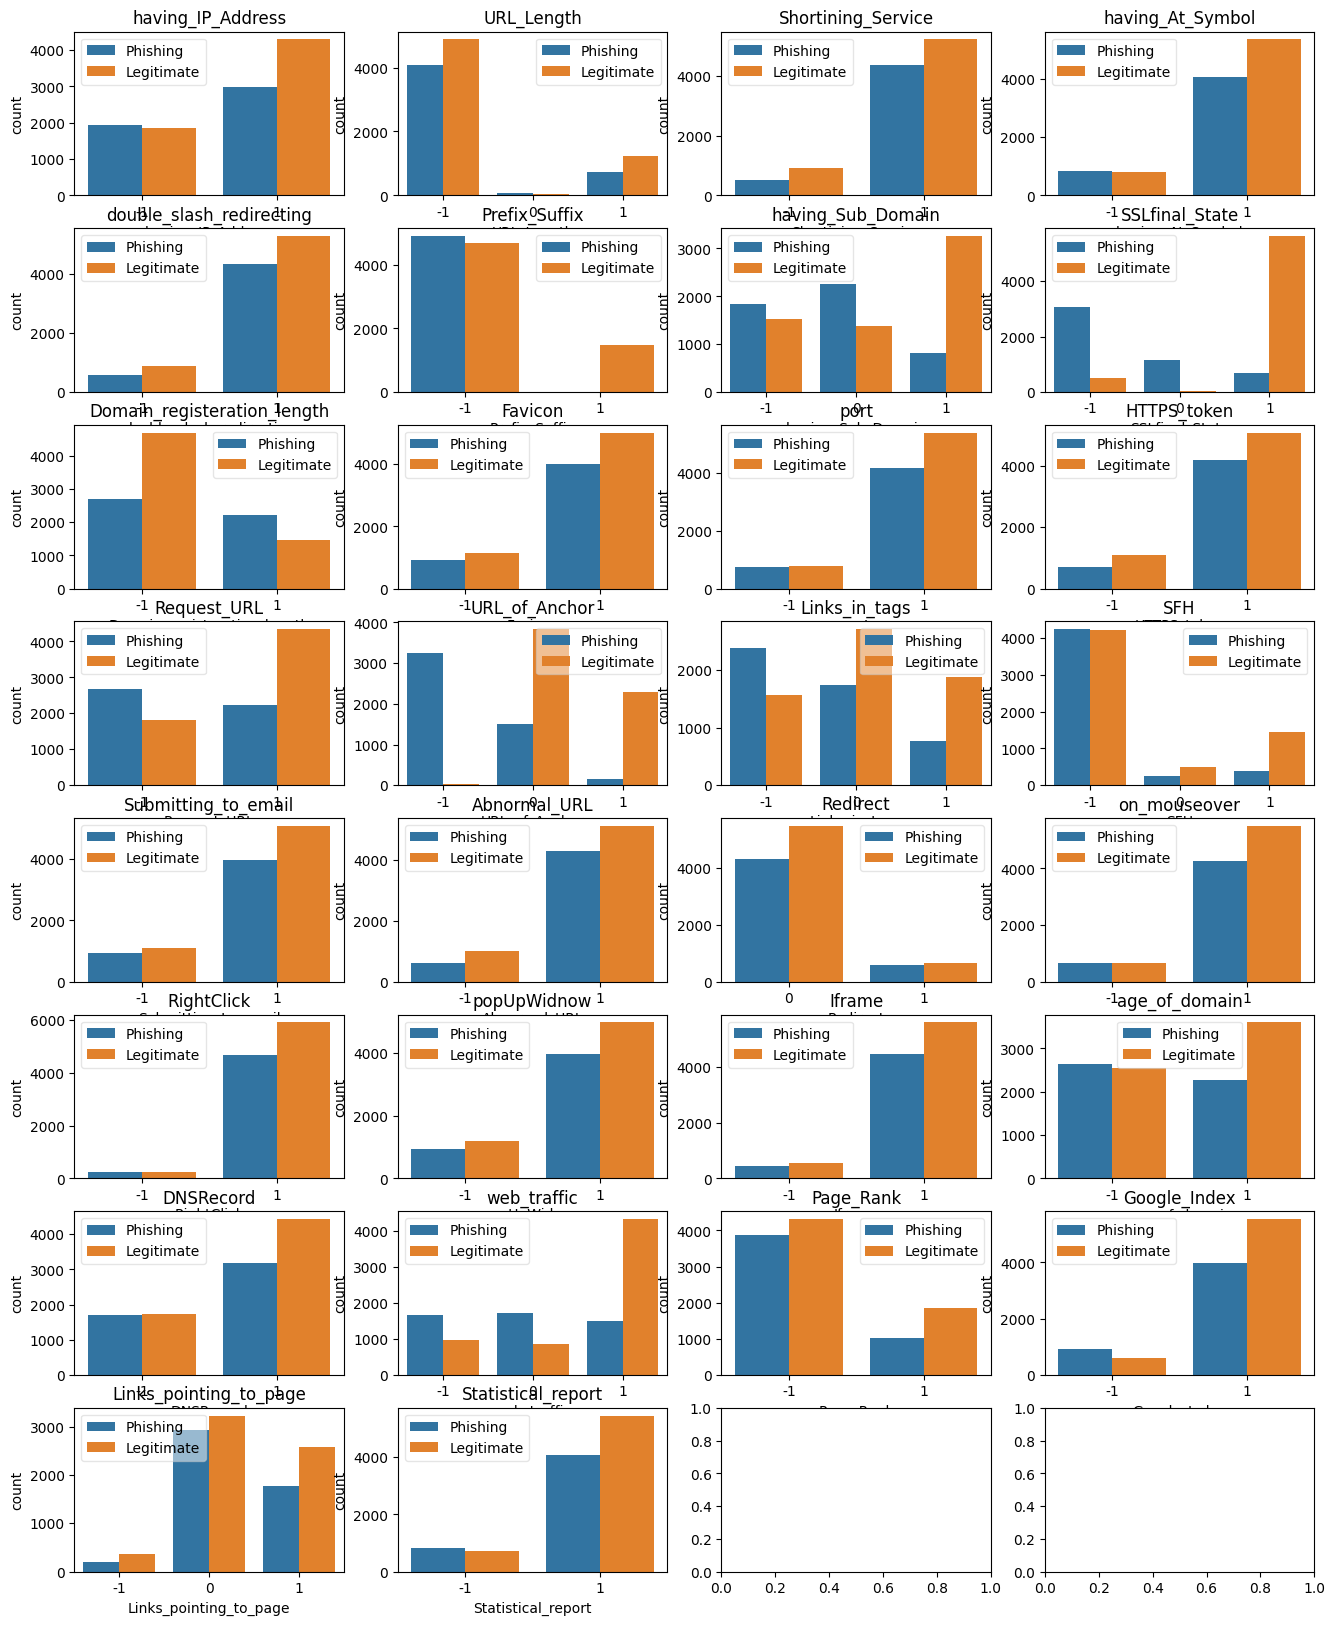

In [114]:
figure, axis = plt.subplots(8, 4)

row = 0
col = 0
ctr = 0
for data_col in X.columns:
    count_phishing_websites = data.loc[data["Result"] == 1,:].groupby(data_col).count().loc[:, "Result"].values
    count_legitimate_websites = data.loc[data["Result"] == -1,:].groupby(data_col).count().loc[:,"Result"].values
    title_name = data.groupby(data_col).count().index.values
    sns.countplot(ax=axis[row, col], data= data, x = data_col, hue="Result")
    axis[row,col].set_title(data_col)
    axis[row,col].legend(loc='best', labels=["Phishing", "Legitimate"], framealpha=0.5)    
    
    ctr += 1
    row = ctr // 4
    col = ctr % 4
    

plt.show()

### Pregled zastupljenosti određenih vrijednosti značajki

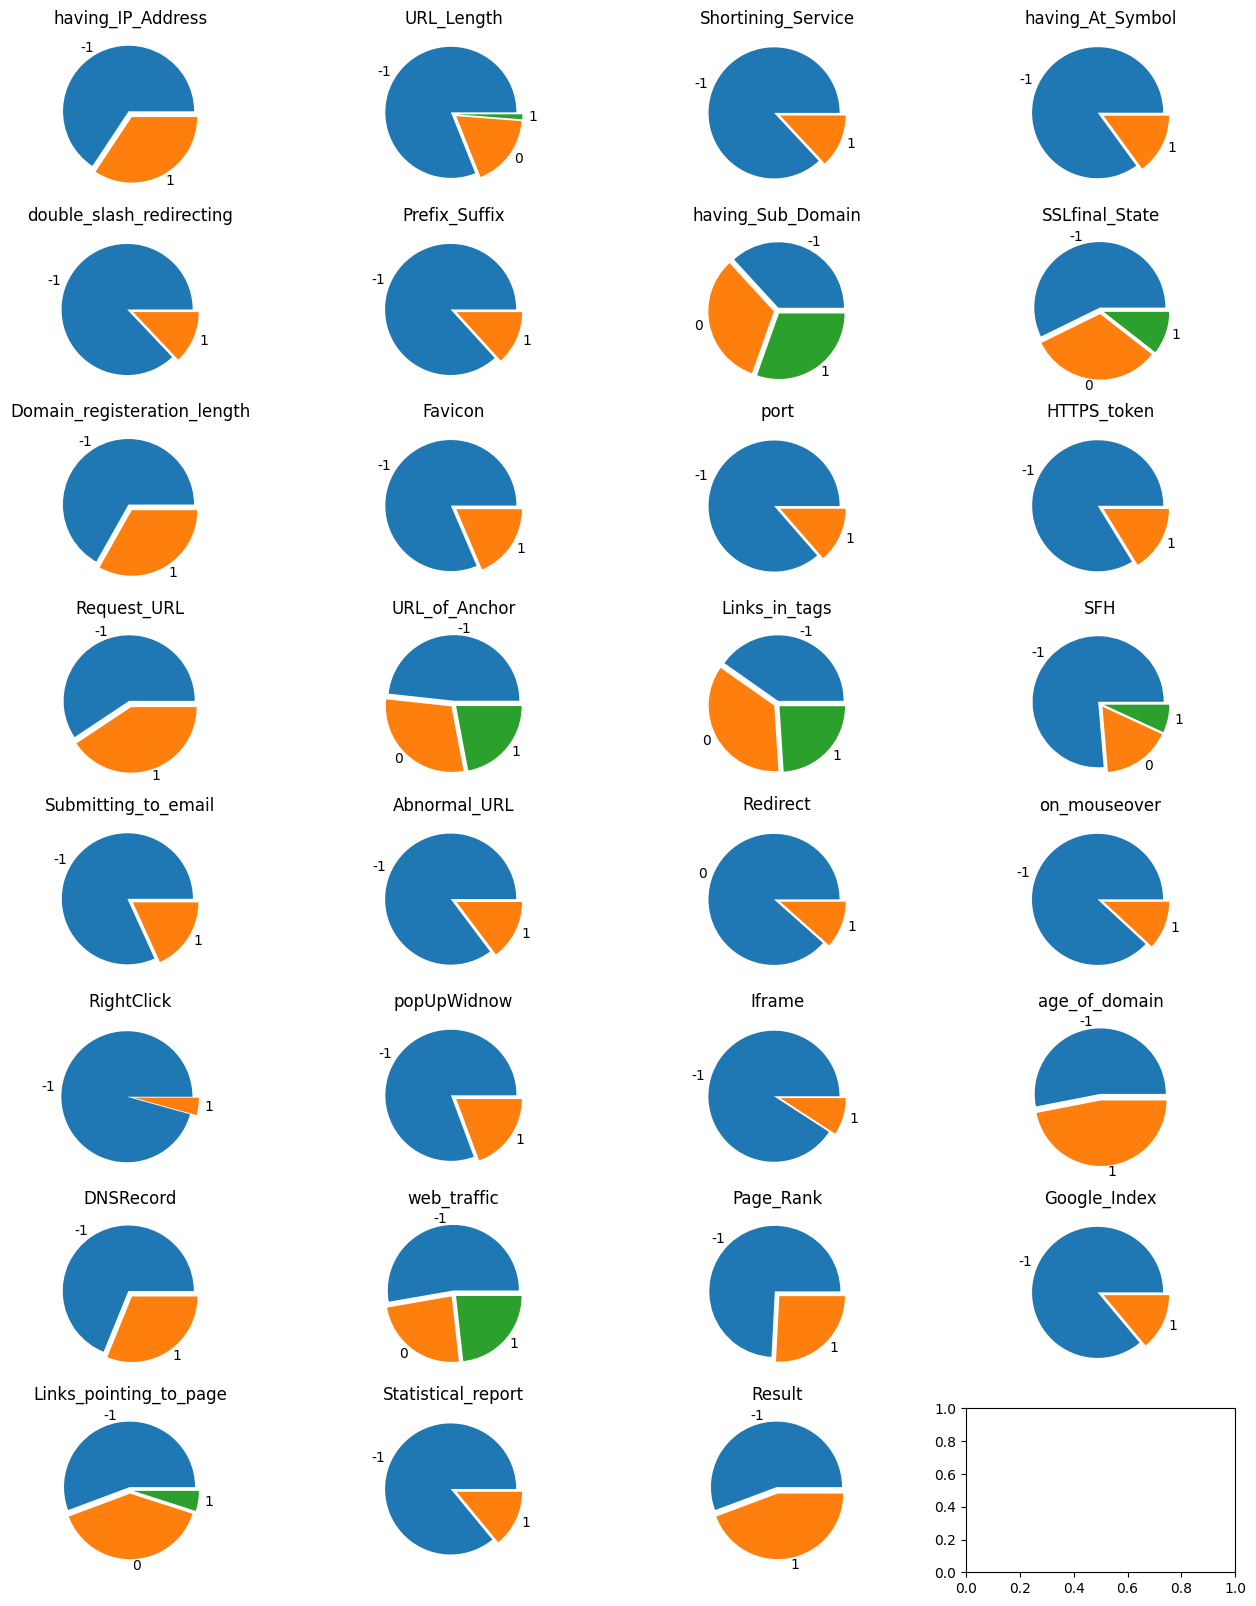

In [115]:
figure, axis = plt.subplots(8, 4)
row = 0
col = 0
ctr = 0
for data_col in data.columns:
    title_name = data.groupby(data_col).count().index.values
    values = data[data_col].value_counts()

    axis[row,col].set_title(data_col)
    axis[row,col].pie(values.to_list(), labels=title_name, explode=[0.05 for _ in values])    
    
    ctr += 1
    row = ctr // 4
    col = ctr % 4
plt.show()

### Test

In [116]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Odnos sume značajki i pripadnosti ciljnom razredu

Kako značajke mogu poprimiti vrijednosti -1, 0 ili 1, gdje -1 pretpostavlja da se radi o phishing stranici, a 1 da se radi o legitimnoj stranici.
Ciljne oznake mogu poprimiti vrijednosti -1 ili 1, te oznaka -1 označava phishing stranicu, dok oznaka 1 označava legitimnu stranicu.

Na temelju ovih vrijednosti može se pretpostaviti da će suma značajki legitimnih stranica u sumi davati vrijednosti blizu iznosa od 30, dok će phishing stranice davati vrijednosti blizu vrijednosti -30.

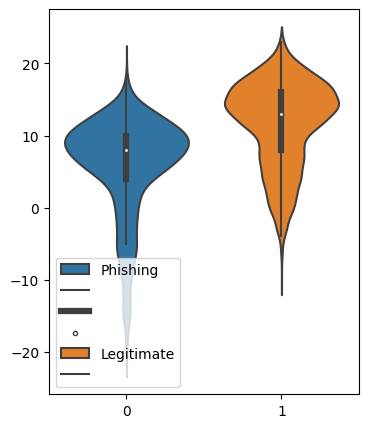

Average (legitimate):11.659736884846517
Average (phishing):5.9340547162106985
Median (legitimate):13.0
Median (phishing):8.0


In [122]:
X_summed = X.sum(axis=1)

plt.rcParams['figure.figsize'] = [4, 5]
sns.violinplot([X_summed[Y["Result"] == -1], X_summed[Y["Result"] == 1]])
plt.legend(loc="best", labels=["Phishing", None, None, None, "Legitimate", None])
plt.show()

print("Average (legitimate):" + str(X_summed[Y["Result"] == 1].mean()))
print("Average (phishing):" + str(X_summed[Y["Result"] == -1].mean()))
print("Median (legitimate):" + str(X_summed[Y["Result"] == 1].median()))
print("Median (phishing):" + str(X_summed[Y["Result"] == -1].median()))

Iz violin plota se može uočiti da postoji razlika u distribucijama phishing stranica i legitimnih stranica, no ta razlika nije velika koliko je bilo očekivano. Iz ovoga se može zaključiti da nemaju sve značajke jednaku važnost te da je potrebno značajkama dodijeliti određene težine.